In [0]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Final_Project_Perceptrons'

# Read in data and display first 5 rows
creditcard = pd.read_csv(data_path + '/creditcard.csv')
creditcard.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# You may have to adjust the data path as needed
synthetic = pd.read_csv(data_path + '/syn_creditcard.csv')
synthetic.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [0]:
# check for empty values
before = len(creditcard)
creditcard = creditcard.dropna()
after = len(creditcard)
print("Before NA Drpped: " + str(before))
print("After NA Drpped: " + str(after))

Before NA Drpped: 284807
After NA Drpped: 284807


Histograms are ineffective visualizations because the data is highly imbalanced

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86cda42a58>]],
      dtype=object)

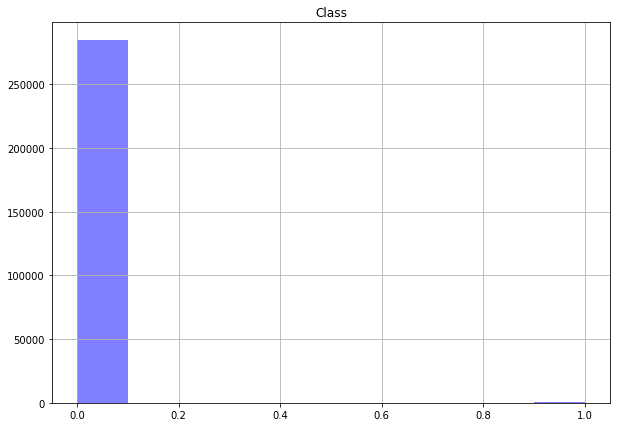

In [0]:
creditcard.hist(column = "Class", color='b' , alpha=0.5, bins=10, figsize= (10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86ca5aac50>]],
      dtype=object)

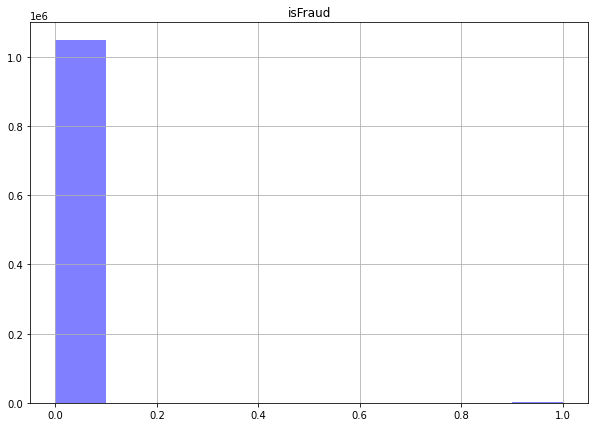

In [0]:
synthetic.hist(column = "isFraud", color='b' , alpha=0.5, bins=10, figsize= (10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86ca590358>,
      dtype=object)

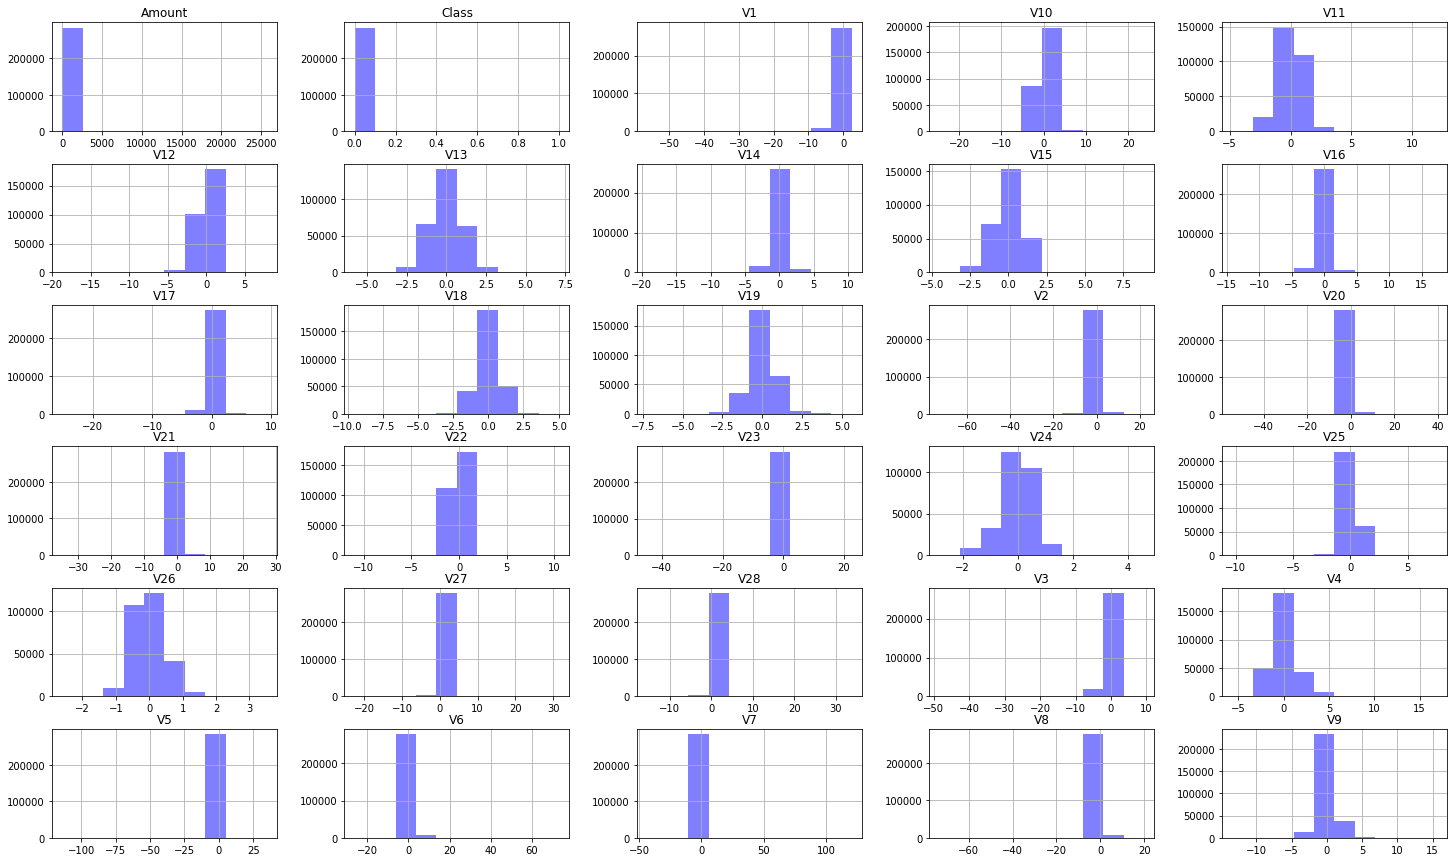

In [0]:
creditcard.hist(color='b', alpha=0.5, bins=10, figsize= (25,15))

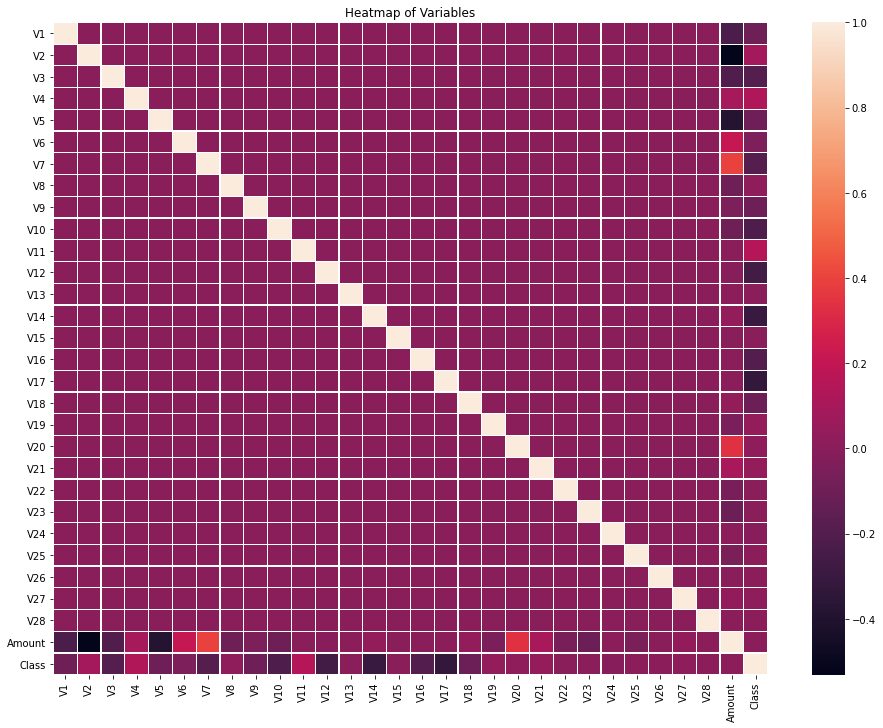

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [0]:
#basic eda for credit card

plt.figure(figsize = (16,12))
ax6 = sns.heatmap(creditcard.corr(),linewidths=.2)
plt.title("Heatmap of Variables")
plt.show()

creditcard.info()

In [0]:
# check for empty values
before1 = len(synthetic)
synthetic = synthetic.dropna()
after1 = len(synthetic)
print("Before NA Drpped: " + str(before1))
print("After NA Drpped: " + str(after1))

Before NA Drpped: 1048575
After NA Drpped: 1048575


In [0]:
# converting "type" object to dummy variables

types = synthetic["type"].str.get_dummies()
#types

# joining types dataframe to the original synthetic dataframe
# and taking the original "type" column out

synthetic2 = pd.concat([synthetic, types], axis=1).drop("type", axis=1)
#synthetic2

# rearranging column order

cols_to_move = ["CASH_IN","CASH_OUT","DEBIT","PAYMENT","TRANSFER"]
synthetic2 = synthetic2[cols_to_move + [col for col in synthetic2.columns if col not in cols_to_move]]

# eliminating string columns for model fitting

syn_no_id = synthetic2.drop(["nameOrig","nameDest"], axis=1)
syn_no_id

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,0,1,0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,0,0,0,1,0,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,0,0,0,0,1,1,181.00,181.00,0.00,0.00,0.00,1,0
3,0,1,0,0,0,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,0,0,0,1,0,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,1,0,0,0,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,0
1048571,0,0,0,1,0,95,9917.36,90545.00,80627.64,0.00,0.00,0,0
1048572,0,0,0,1,0,95,14140.05,20545.00,6404.95,0.00,0.00,0,0
1048573,0,0,0,1,0,95,10020.05,90605.00,80584.95,0.00,0.00,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f871587c550>,
      dtype=object)

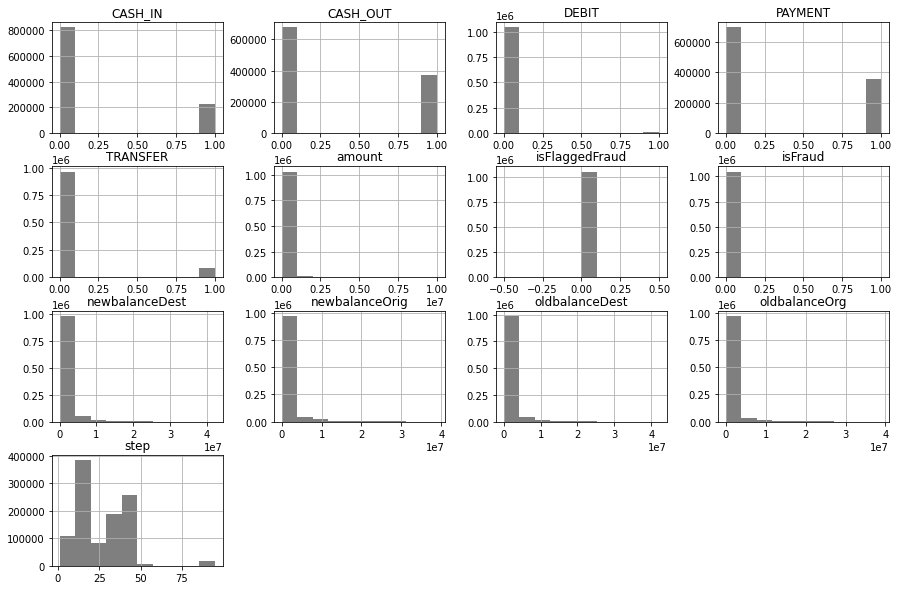

In [0]:
syn_no_id.hist(color='k', alpha=0.5, bins=10, figsize= (15,10))

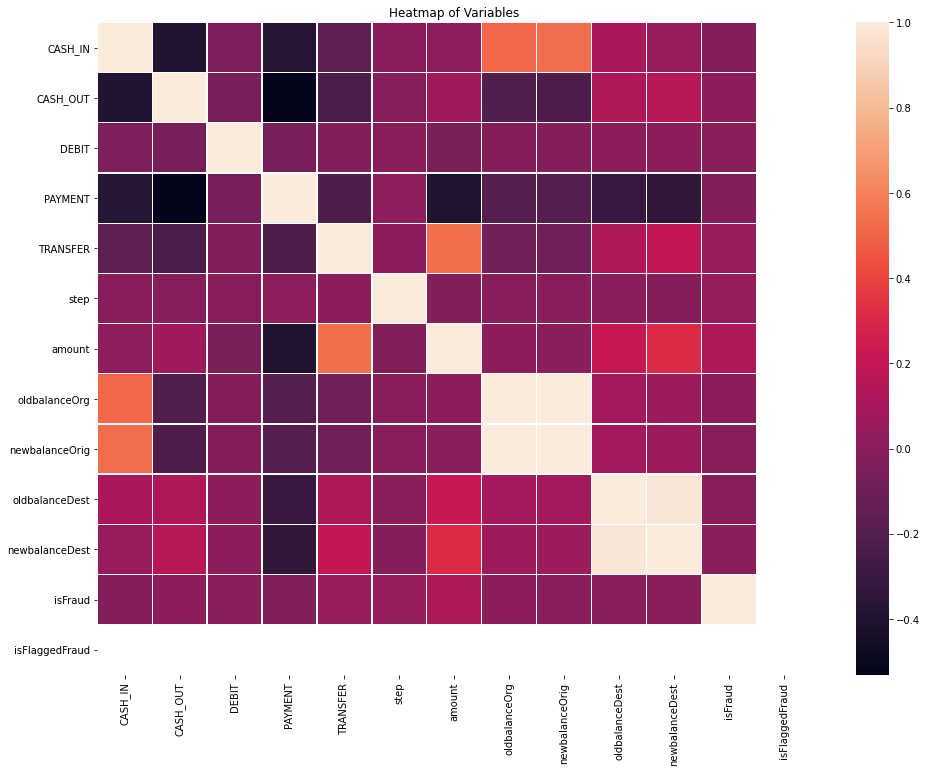

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   CASH_IN         1048575 non-null  int64  
 1   CASH_OUT        1048575 non-null  int64  
 2   DEBIT           1048575 non-null  int64  
 3   PAYMENT         1048575 non-null  int64  
 4   TRANSFER        1048575 non-null  int64  
 5   step            1048575 non-null  int64  
 6   amount          1048575 non-null  float64
 7   oldbalanceOrg   1048575 non-null  float64
 8   newbalanceOrig  1048575 non-null  float64
 9   oldbalanceDest  1048575 non-null  float64
 10  newbalanceDest  1048575 non-null  float64
 11  isFraud         1048575 non-null  int64  
 12  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 112.0 MB


In [0]:
#basic eda for synthetic credit card data

plt.figure(figsize = (16,12))
ax6 = sns.heatmap(syn_no_id.corr(),linewidths=.2)
plt.title("Heatmap of Variables")
plt.show()

syn_no_id.info()

In [0]:
creditcard_xy = creditcard
creditcard_y = creditcard['Class']
creditcard = creditcard.drop('Class', axis=1)

creditcard_y.value_counts()
not_fraud = creditcard_y.value_counts()[0]
fraud = creditcard_y.value_counts()[1]
total = fraud + not_fraud
print("The number of fraud cases is " + str(fraud) + " therefore the probability is " + str(fraud) + "/" + str(total) + " = " + str(fraud/total))
print("The number of non-fraud cases is " + str(not_fraud) + " therefore the probability is " + str(not_fraud) + "/" + str(total)+ " = " + str(not_fraud/total))

The number of fraud cases is 492 therefore the probability is 492/284807 = 0.001727485630620034
The number of non-fraud cases is 284315 therefore the probability is 284315/284807 = 0.9982725143693799


NULL MODEL FOR CREDITCARD.CSV

The Null model therefore assumes every case is "0" or is not fraud as this scenario is more likely. There is a higher frequency of not fraud cases in the data. Because the data is heavily skewed towards most transactions not being fraud, the null model is extremely accurate. However, we are interested in a more advanced technique so that we are able to predict when those few fraud cases would occur.

Text(91.68, 0.5, 'predicted label')

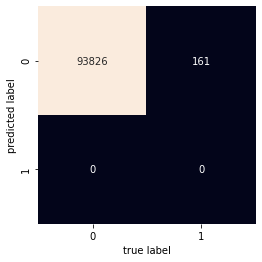

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression as lm
import matplotlib.pyplot as plt

#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(creditcard, creditcard_y, test_size=0.33, random_state=4)

# create yp vector of 0s
null_yp = np.zeros(len(creditcard_y))
null_preds = np.zeros(len(y_test))

cnf_matrix = metrics.confusion_matrix(y_test, null_preds)
sns.heatmap(cnf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, null_preds)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, null_preds, zero_division=1)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, null_preds, zero_division=1)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, null_preds, zero_division=1)))

print("Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on")

The error rate is 0.0017130028620979676
The precision score is 1.0
The recall score is 0.0
The F1 score is 0.0
Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on


In [0]:
synthetic_y = syn_no_id['isFraud']
synthetic = syn_no_id.drop('isFraud', axis=1)

synthetic_y.value_counts()
not_fraud2 = synthetic_y.value_counts()[0]
fraud2 = synthetic_y.value_counts()[1]
total2 = fraud2 + not_fraud2
print("The number of fraud cases is " + str(fraud2) + " therefore the probability is " + str(fraud2) + "/" + str(total2) + " = " + str(fraud2/total2))
print("The number of non-fraud cases is " + str(not_fraud2) + " therefore the probability is " + str(not_fraud2) + "/" + str(total2)+ " = " + str(not_fraud2/total2))

The number of fraud cases is 1142 therefore the probability is 1142/1048575 = 0.0010890971079798775
The number of non-fraud cases is 1047433 therefore the probability is 1047433/1048575 = 0.9989109028920201


Text(91.68, 0.5, 'predicted label')

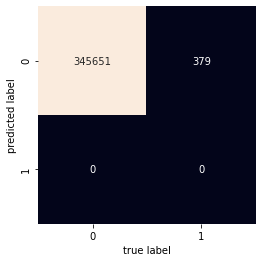

In [0]:
#synthetic dataset

#Split arrays or matrices into random train and test subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(synthetic, synthetic_y, test_size=0.33, random_state=13)

# create yp vector of 0s
null_yp = np.zeros(len(synthetic_y))
null_preds2 = np.zeros(len(y_test2))

cnf_matrix2 = metrics.confusion_matrix(y_test2, null_preds2)
sns.heatmap(cnf_matrix2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test2, null_preds2)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test2, null_preds2, zero_division=1)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test2, null_preds2, zero_division=1)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test2, null_preds2, zero_division=1)))

print("Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on")

The error rate is 0.0010952807560038469
The precision score is 1.0
The recall score is 0.0
The F1 score is 0.0
Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on


Logistic Regression was used to predict whether a transaction was fraud.

In [0]:

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
lrmodel = logreg.fit(X_train,y_train)
#predict
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

# Evaluate accuracy
print("accuracy score: " + str(accuracy_score(y_test, y_pred)))

#get confusion matrix for logreg
cnf_matrix = metrics.confusion_matrix(y_test, y_pred).T
cnf_matrix

accuracy score: 0.9992020173002649


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[93807,    56],
       [   19,   105]])

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, y_pred)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, y_pred)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, y_pred)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, y_pred)))

print("Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on")

The error rate is 0.0007979826997350781
The precision score is 0.8467741935483871
The recall score is 0.6521739130434783
The F1 score is 0.7368421052631577
Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on


In [0]:
from sklearn.metrics import roc_auc_score, roc_curve


train_lr_predictions = lrmodel.predict(X_train)
train_lr_probs = lrmodel.predict_proba(X_train)[:, 1]

lr_probs = lrmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
lr_roc_value = roc_auc_score(y_test, lr_probs)
lr_roc_value

0.9771989064467557

In [0]:
# coefficients and intercept

columnlist = creditcard.columns.tolist()
coef_dict = {}
for coef, feature in zip(lrmodel.coef_[0,:], columnlist):
  coef_dict[feature] = coef

print(coef_dict)
print("intercept: " + str(lrmodel.intercept_))

{'V1': -0.13249548886095905, 'V2': -0.3045113316493713, 'V3': -0.06145368597896267, 'V4': 0.450647135914813, 'V5': -0.3704195271590263, 'V6': 0.2047946640375364, 'V7': 0.646365273037355, 'V8': -0.24847177155928643, 'V9': -0.4133605264512823, 'V10': -0.6989853179705766, 'V11': 0.0005673648861928378, 'V12': -0.21205654391759335, 'V13': -0.2205179731588492, 'V14': -0.4822048707085507, 'V15': -0.24036017534595486, 'V16': -0.4332514858447908, 'V17': -0.04056052897292596, 'V18': 0.26146699565385184, 'V19': -0.22634233818512134, 'V20': 1.3258695480436462, 'V21': 0.6343496186463365, 'V22': 0.16523934206319854, 'V23': -0.33709738912845233, 'V24': -0.05201947824849471, 'V25': -0.17925693561811076, 'V26': -0.04603875305643179, 'V27': -0.1483221322790421, 'V28': -0.004517268249909326, 'Amount': -0.008277764680455898}
intercept: [-7.46771944]


In [0]:
# feature importance

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

smf = SelectFromModel(lrmodel, threshold=-np.inf, max_features=8)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = X_train.columns[feature_idx]
feature_name

#tried getting feature importances, but only could get coefficients


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Index(['V4', 'V7', 'V9', 'V10', 'V14', 'V16', 'V20', 'V21'], dtype='object')

In [0]:
smf.transform(X_train)

array([[ 1.18377025,  0.33370415, -0.58806868, ..., -0.74802263,
         0.13197047,  0.06570521],
       [-1.21199079,  1.7227294 ,  1.61309842, ..., -0.4831502 ,
         0.24316972, -0.11671914],
       [-0.8645459 ,  0.32067374,  0.59981322, ...,  0.53923145,
         0.10907703,  0.20861762],
       ...,
       [-0.51062291, -1.28756816, -0.1522473 , ...,  1.39491043,
         0.0750568 ,  0.3830815 ],
       [-2.49750514, -1.83442629, -1.73664802, ...,  0.17332577,
        -0.19853632, -0.11522745],
       [-0.72942394, -1.23468792, -0.56436688, ...,  1.36013522,
         0.04251374,  0.47348613]])

{'V4': 0.450647135914813, 'V7': 0.646365273037355, 'V9': -0.4133605264512823, 'V10': -0.6989853179705766, 'V14': -0.4822048707085507, 'V16': -0.4332514858447908, 'V20': 1.3258695480436462, 'V21': 0.6343496186463365}


Text(0.5, 1.0, 'feature importance')

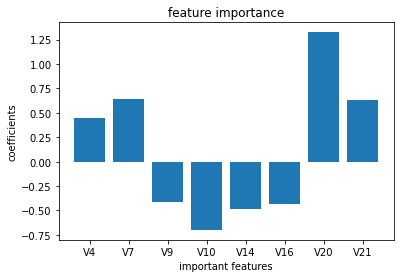

In [0]:
feature_name_t = tuple(X_train.columns[feature_idx])
important_coef = {}
for i in feature_name_t:
  important_coef[i] = coef_dict.get(i)
print(important_coef)

plt.bar(important_coef.keys(), important_coef.values())
plt.ylabel("coefficients")
plt.xlabel("important features")
plt.title("feature importance")


In [0]:
#scaling amount column
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

scaled_credit = scaleColumns(creditcard, ["Amount"])
scaled_credit

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389


In [0]:
# we tried scaling the amount column on the credit card dataset

#Split arrays or matrices into random train and test subsets
s_X_train, s_X_test, y_train, y_test = train_test_split(scaled_credit, creditcard_y, test_size=0.33, random_state=4)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
lrmodel_ = logreg.fit(s_X_train,y_train)
#predict
y_pred_ = logreg.predict(s_X_test)

# Evaluate accuracy
print("accuracy score: " + str(accuracy_score(y_test, y_pred_)))

#get confusion matrix for logreg
cnf_matrix_ = metrics.confusion_matrix(y_test, y_pred_).T
cnf_matrix_


accuracy score: 0.9993084149935629


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[93813,    52],
       [   13,   109]])

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve


train_lr__predictions = lrmodel_.predict(s_X_train)
train_lr__probs = lrmodel_.predict_proba(s_X_train)[:, 1]

lr_probs_ = lrmodel_.predict_proba(s_X_test)[:, 1]

# Calculate roc auc
lr_roc_value_ = roc_auc_score(y_test, lr_probs_)
lr_roc_value_

0.982999322255429

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, y_pred_)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, y_pred_)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, y_pred_)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, y_pred_)))

The error rate is 0.0006915850064370677
The precision score is 0.8934426229508197
The recall score is 0.6770186335403726
The F1 score is 0.7703180212014135


In [0]:
# coefficients and intercept

columnlist = creditcard.columns.tolist()
coef_dict_ = {}
for coef, feature in zip(lrmodel_.coef_[0,:], columnlist):
  coef_dict_[feature] = coef

print(coef_dict_)
print("intercept: " + str(lrmodel_.intercept_))

{'V1': -0.023060187634344753, 'V2': 0.05001455625903481, 'V3': -0.015948875090414427, 'V4': 0.7627135665837371, 'V5': 0.13170748804663293, 'V6': -0.12245899118868257, 'V7': 0.10613745614281096, 'V8': -0.20265479281686546, 'V9': -0.10894544792254887, 'V10': -0.8005279211570887, 'V11': -0.055406238381380375, 'V12': 0.10688705406183192, 'V13': -0.27504488565175766, 'V14': -0.4719630015955429, 'V15': -0.18936505024682326, 'V16': -0.40067088483195495, 'V17': -0.12165302977682857, 'V18': 0.22971179593629504, 'V19': -0.12825211698896583, 'V20': -0.29903952551938484, 'V21': 0.3151459655631476, 'V22': 0.4022255785405005, 'V23': -0.10268229690460554, 'V24': 0.16057937174927328, 'V25': -0.15311281679042063, 'V26': 0.12744789038632184, 'V27': -0.5281313737066905, 'V28': -0.2239959177518545, 'Amount': 0.22954475516459621}
intercept: [-8.62114841]


In [0]:
# feature importance


smf_ = SelectFromModel(lrmodel_, threshold=-np.inf, max_features=8)
smf_.fit(s_X_train, y_train)
s_feature_idx = smf_.get_support()
s_feature_name = s_X_train.columns[s_feature_idx]
s_feature_name


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Index(['V4', 'V10', 'V14', 'V16', 'V20', 'V21', 'V22', 'V27'], dtype='object')

In [0]:
smf_.transform(s_X_train)

array([[ 1.18377025, -0.19368495,  0.70122226, ...,  0.06570521,
         0.23129135,  0.2704509 ],
       [-1.21199079,  0.63387747,  1.70624041, ..., -0.11671914,
         0.42568357, -0.23833426],
       [-0.8645459 , -1.41525588, -1.15807637, ...,  0.20861762,
         0.21122826,  0.25954308],
       ...,
       [-0.51062291,  0.69889601, -0.20180156, ...,  0.3830815 ,
         0.97021228,  0.02832086],
       [-2.49750514,  1.48732324, -0.36996878, ..., -0.11522745,
        -0.05726635,  0.05529407],
       [-0.72942394,  0.7484305 , -0.06102189, ...,  0.47348613,
         1.25361672,  0.04313231]])

{'V4': 0.450647135914813, 'V7': 0.646365273037355, 'V9': -0.4133605264512823, 'V10': -0.6989853179705766, 'V14': -0.4822048707085507, 'V16': -0.4332514858447908, 'V20': 1.3258695480436462, 'V21': 0.6343496186463365}


Text(0.5, 1.0, 'feature importance')

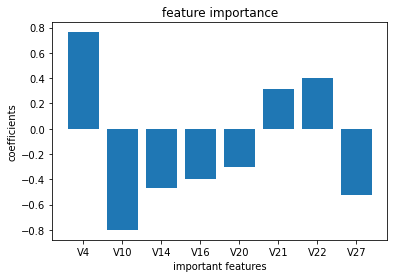

In [0]:
s_feature_name_t = tuple(s_X_train.columns[s_feature_idx])
s_important_coef = {}
for i in s_feature_name_t:
  s_important_coef[i] = coef_dict_.get(i)
print(important_coef)

plt.bar(s_important_coef.keys(), s_important_coef.values())
plt.ylabel("coefficients")
plt.xlabel("important features")
plt.title("feature importance")


In [0]:


# fit the model with data
lrmodel2 = logreg.fit(X_train2,y_train2)
#predict
y_pred2 = logreg.predict(X_test2)

# Evaluate accuracy
print("accuracy score: " + str(accuracy_score(y_test2, y_pred2)))

#get confusion matrix for logreg
cnf_matrix2 = metrics.confusion_matrix(y_test2, y_pred2).T
cnf_matrix2

accuracy score: 0.9989856370834899


array([[345542,    242],
       [   109,    137]])

In [0]:
train_lr2_predictions = lrmodel2.predict(X_train2)
train_lr2_probs = lrmodel2.predict_proba(X_train2)[:, 1]

lr_probs2 = lrmodel2.predict_proba(X_test2)[:, 1]

# Calculate roc auc
lr_roc_value2 = roc_auc_score(y_test2, lr_probs2)
lr_roc_value2

0.8604804292315866

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test2, y_pred2)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test2, y_pred2)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test2, y_pred2)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test2, y_pred2)))

print("Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on")
print("\n")
print("Credit card data has better F1 score (0.7368) compared to synthetic data (0.4384)")

The error rate is 0.0010143629165101364
The precision score is 0.556910569105691
The recall score is 0.36147757255936674
The F1 score is 0.4384
Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on


Credit card data has better F1 score (0.7368) compared to synthetic data (0.4384)


In [0]:
# coefficients and intercept

columnlist2 = synthetic.columns.tolist()
coef_dict2 = {}
for coef, feature in zip(lrmodel2.coef_[0,:], columnlist2):
  coef_dict2[feature] = coef

print(coef_dict2)
print("intercept: " + str(lrmodel2.intercept_))

{'CASH_IN': -4.716253889289384e-06, 'CASH_OUT': -0.0006032128189155478, 'DEBIT': -0.00013959572581726033, 'PAYMENT': -0.007721392659757302, 'TRANSFER': 1.829385281622442e-05, 'step': -0.23712261133747556, 'amount': -0.0002051317273809771, 'oldbalanceOrg': 0.00022234053722370429, 'newbalanceOrig': -0.0002618522428879375, 'oldbalanceDest': 2.806218752979759e-06, 'newbalanceDest': -4.3524550054126325e-06, 'isFlaggedFraud': 0.0}
intercept: [-0.00845062]


In [0]:
# feature importance


smf2 = SelectFromModel(lrmodel2, threshold=-np.inf, max_features=8)
smf2.fit(X_train2, y_train2)
feature_idx2 = smf2.get_support()
feature_name2 = X_train2.columns[feature_idx2]
feature_name2


Index(['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'step', 'amount',
       'oldbalanceOrg', 'newbalanceOrig'],
      dtype='object')

In [0]:
smf2.transform(X_train2)

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0578990e+04,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 6.7542500e+03,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 6.8672600e+03,
        4.0824130e+04, 3.3956880e+04],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.0462043e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.3912058e+05,
        3.0873000e+04, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.3154620e+04,
        6.9347740e+04, 5.6193110e+04]])

{'CASH_OUT': -0.0006032128189155478, 'DEBIT': -0.00013959572581726033, 'PAYMENT': -0.007721392659757302, 'TRANSFER': 1.829385281622442e-05, 'step': -0.23712261133747556, 'amount': -0.0002051317273809771, 'oldbalanceOrg': 0.00022234053722370429, 'newbalanceOrig': -0.0002618522428879375}


Text(0.5, 1.0, 'feature importance')

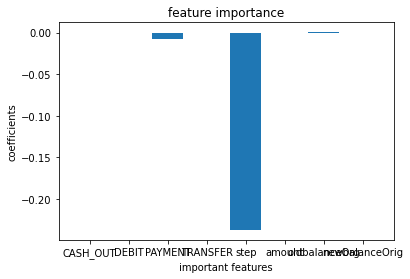

In [0]:
feature_name_t2 = tuple(X_train2.columns[feature_idx2])
important_coef2 = {}
for i in feature_name_t2:
  important_coef2[i] = coef_dict2.get(i)
print(important_coef2)

plt.bar(important_coef2.keys(), important_coef2.values())
plt.ylabel("coefficients")
plt.xlabel("important features")
plt.title("feature importance")


In [0]:
# scaling certain columns from synthetic data

scaled_synthetic = scaleColumns(synthetic, ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"])
scaled_synthetic

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,0,0,1,0,0.0,0.000984,0.004374,0.004121,0.000000,0.000000,0
1,0,0,0,1,0,0.0,0.000186,0.000546,0.000498,0.000000,0.000000,0
2,0,0,0,0,1,0.0,0.000018,0.000005,0.000000,0.000000,0.000000,0
3,0,1,0,0,0,0.0,0.000018,0.000005,0.000000,0.000503,0.000000,0
4,0,0,0,1,0,0.0,0.001167,0.001068,0.000768,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,1,0,0,0,1.0,0.013256,0.012334,0.008927,0.011504,0.014618,0
1048571,0,0,0,1,0,1.0,0.000992,0.002328,0.002073,0.000000,0.000000,0
1048572,0,0,0,1,0,1.0,0.001414,0.000528,0.000165,0.000000,0.000000,0
1048573,0,0,0,1,0,1.0,0.001002,0.002329,0.002072,0.000000,0.000000,0


In [0]:
# with the scaled synthetic data

#Split arrays or matrices into random train and test subsets
s_X_train2, s_X_test2, y_train2, y_test2 = train_test_split(scaled_synthetic, synthetic_y, test_size=0.33, random_state=4)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
lrmodel2_ = logreg.fit(s_X_train2,y_train2)
#predict
y_pred2_ = logreg.predict(s_X_test2)

# Evaluate accuracy
print("accuracy score: " + str(accuracy_score(y_test2, y_pred2_)))

#get confusion matrix for logreg
cnf_matrix2_ = metrics.confusion_matrix(y_test2, y_pred2_).T
cnf_matrix2_

accuracy score: 0.9990029766205243


array([[345650,    345],
       [     0,     35]])

In [0]:
train_lr2__predictions = lrmodel2_.predict(s_X_train2)
train_lr2__probs = lrmodel2_.predict_proba(s_X_train2)[:, 1]

lr_probs2_ = lrmodel2_.predict_proba(s_X_test2)[:, 1]

# Calculate roc auc
lr_roc_value2_ = roc_auc_score(y_test2, lr_probs2_)
lr_roc_value2_

0.930385330460536

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test2, y_pred2_)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test2, y_pred2_)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test2, y_pred2_)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test2, y_pred2_)))

The error rate is 0.0009970233794757144
The precision score is 1.0
The recall score is 0.09210526315789473
The F1 score is 0.1686746987951807


In [0]:
# coefficients and intercept

columnlist2_ = synthetic.columns.tolist()
coef_dict2_ = {}
for coef, feature in zip(lrmodel2_.coef_[0,:], columnlist2_):
  coef_dict2_[feature] = coef

print(coef_dict2_)
print("intercept: " + str(lrmodel2_.intercept_))

{'CASH_IN': -3.315386308856119, 'CASH_OUT': 2.657365545398319, 'DEBIT': -0.3582947498972527, 'PAYMENT': -2.5880139063884977, 'TRANSFER': 3.5909341664002192, 'step': 4.563468576781711, 'amount': 11.109201508078273, 'oldbalanceOrg': 9.165117686939674, 'newbalanceOrig': -1.8662392922384325, 'oldbalanceDest': -6.341199216738473, 'newbalanceDest': -7.7452917799439875, 'isFlaggedFraud': 0.0}
intercept: [-10.68497091]


In [0]:
# feature importance


smf2_ = SelectFromModel(lrmodel2_, threshold=-np.inf, max_features=8)
smf2_.fit(s_X_train2, y_train2)
feature_idx2_ = smf2_.get_support()
feature_name2_ = s_X_train2.columns[feature_idx2_]
feature_name2_


Index(['CASH_IN', 'CASH_OUT', 'TRANSFER', 'step', 'amount', 'oldbalanceOrg',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [0]:
smf2_.transform(s_X_train2)


array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.32647815e-05, 1.22226637e-02, 2.09380905e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.53984576e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.29868072e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.61182519e-05, 1.39241841e-02, 1.47518308e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

{'CASH_IN': -3.315386308856119, 'CASH_OUT': 2.657365545398319, 'TRANSFER': 3.5909341664002192, 'step': 4.563468576781711, 'amount': 11.109201508078273, 'oldbalanceOrg': 9.165117686939674, 'oldbalanceDest': -6.341199216738473, 'newbalanceDest': -7.7452917799439875}


Text(0.5, 1.0, 'feature importance')

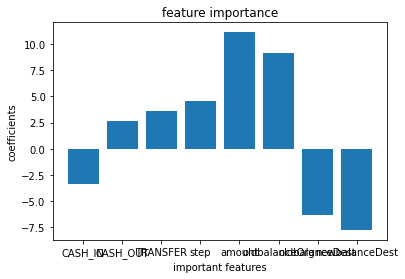

In [0]:
feature_name_t2_ = tuple(s_X_train2.columns[feature_idx2_])
important_coef2_ = {}
for i in feature_name_t2_:
  important_coef2_[i] = coef_dict2_.get(i)
print(important_coef2_)

plt.bar(important_coef2_.keys(), important_coef2_.values())
plt.ylabel("coefficients")
plt.xlabel("important features")
plt.title("feature importance")


Below are the NaiveBayesels for the creditcard.csv data.

First, we use a gaussian model.



[0 0 0 ... 0 0 0]
0.9765925074744379


Text(91.68, 0.5, 'predicted label')

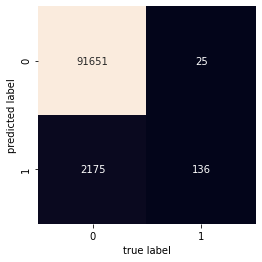

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

features = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]
# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model_nb = gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
print(preds)

from sklearn import datasets, naive_bayes, metrics, feature_extraction
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(y_test, preds))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, preds)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, preds)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, preds)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, preds)))

print("Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on")

The error rate is 0.023407492525562068
The precision score is 0.05884898312418866
The recall score is 0.84472049689441
The F1 score is 0.11003236245954692
Because of imbalanced class distribution, F1 score is a better metric than accuracy to evaluate the model on


Below are the NaiveBayesels for the Synthetic data

[0 0 0 ... 0 0 0]
0.9871485131346993
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    345651
           1       0.03      0.28      0.05       379

    accuracy                           0.99    346030
   macro avg       0.51      0.64      0.52    346030
weighted avg       1.00      0.99      0.99    346030



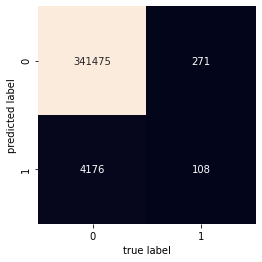

In [0]:
synthetic_y = syn_no_id['isFraud']
synthetic = syn_no_id.drop('isFraud', axis=1)

#Split arrays or matrices into random train and test subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(synthetic, synthetic_y, test_size=0.33, random_state=13)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model_nb2 = gnb.fit(X_train2, y_train2)
preds2 = gnb.predict(X_test2)
print(preds2)

# Evaluate accuracy
print(accuracy_score(y_test2, preds2))

#confusion matrix
mat = confusion_matrix(y_test2, preds2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print(metrics.classification_report(y_test2, preds2, zero_division=1))

In [0]:
#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test2, preds2)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test2, preds2)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test2, preds2)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test2, preds2)))

The error rate is 0.012851486865300688
The precision score is 0.025210084033613446
The recall score is 0.2849604221635884
The F1 score is 0.04632211022946601


Below is code attempting to do RandomForest Classification on creditcard data

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(max_features=27, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )# Fit on training data
model_rf.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model_rf.predict(X_test)
# Probabilities for each class
rf_probs = model_rf.predict_proba(X_test)[:, 1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [0]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[5,10],
              "max_features": [5,10,15]}


In [0]:
grid_search = GridSearchCV(model_rf, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=2,
                                              max_features=27,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=3,
                                           

In [0]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7765264586160109
{'max_depth': None, 'max_features': 15, 'n_estimators': 10}


In [0]:
rf = RandomForestClassifier(max_depth=None, max_features = 15, n_estimators = 10)
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.00978453 0.00813612 0.01051843 0.02415312 0.00527181 0.01437204
 0.0237247  0.0072405  0.00998281 0.0788974  0.0168939  0.04798198
 0.01336448 0.17988737 0.01368896 0.01534612 0.37214755 0.00590023
 0.01935031 0.01123617 0.01735054 0.01355093 0.00355865 0.00812079
 0.00823464 0.02614023 0.00807688 0.00998039 0.01710842]


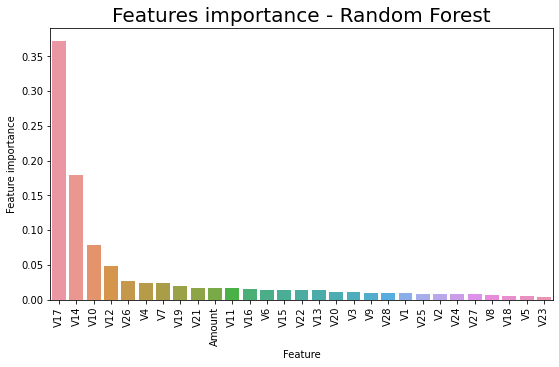

In [0]:
features = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

0.9992552161469139


Text(91.68, 0.5, 'predicted label')

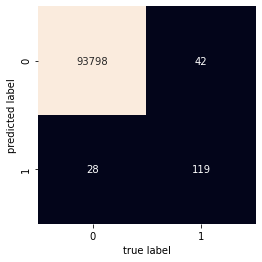

In [0]:
# Evaluate accuracy
print(accuracy_score(y_test, rf_predictions))

#confusion matrix
matrf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(matrf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
#accuracy
print("The accuracy score is " + str(metrics.accuracy_score(y_test, rf_predictions)))

#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, rf_predictions)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, rf_predictions)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, rf_predictions)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, rf_predictions)))

The accuracy score is 0.9992552161469139
The error rate is 0.0007447838530860729
The precision score is 0.8095238095238095
The recall score is 0.7391304347826086
The F1 score is 0.7727272727272727


In [0]:
#y_pred_proba = clf.predict_proba(X_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

AttributeError: ignored

In [0]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


train_rf_predictions = model_rf.predict(X_train)
train_rf_probs = model_rf.predict_proba(X_train)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


0.9375100043121979

Below is the code for a RandomForestClassifier model for the synthetic data.

In [0]:
# Create the model with 100 trees
model_rf2 = RandomForestClassifier(max_features=8, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,7],
              "max_features": [4,5,7]}

grid_search2 = GridSearchCV(model_rf2, param_grid=param_grid, cv=5, scoring='recall')
grid_search2.fit(X_train2, y_train2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=2,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=3,
                                            

In [0]:
print(grid_search2.best_score_)
print(grid_search2.best_params_)

0.8230908152734779
{'max_depth': None, 'max_features': 4, 'n_estimators': 7}


In [0]:
rf2 = RandomForestClassifier(max_depth=5, max_features = 4, n_estimators = 7)
rf2.fit(X_train2, y_train2)
print(rf2.feature_importances_)

[8.17962165e-04 7.31575051e-05 0.00000000e+00 9.42893191e-03
 1.20514588e-02 3.21545436e-01 2.29409103e-01 1.71721633e-01
 9.88026073e-02 7.54726421e-02 8.06770689e-02 0.00000000e+00]


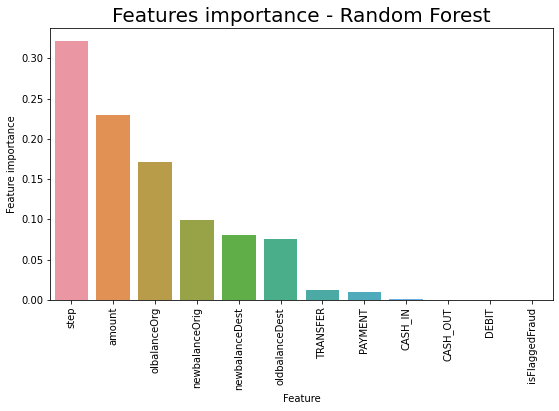

In [0]:
features2 = ["CASH_IN","CASH_OUT","DEBIT","PAYMENT","TRANSFER","step","amount","olbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFlaggedFraud"]

plt.figure(figsize = (9,5))

feat_import2 = pd.DataFrame({'Feature': features2, 'Feature importance': rf2.feature_importances_})
feat_import2 = feat_import2.sort_values(by='Feature importance',ascending=False)

g2 = sns.barplot(x='Feature',y='Feature importance',data=feat_import2)
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title('Features importance - Random Forest',fontsize=20)
plt.show()  

Below is an IsolationForest prediction for the creditcard data.

In [0]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour='new', max_samples=len(X_train), random_state=2, contamination='auto')
clf.fit(X_train)
y_pred_clf = clf.predict(X_test)

# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred_clf[y_pred_clf == 1] = 0
y_pred_clf[y_pred_clf == -1] = 1
#print confusion matrix
clf_matrix = confusion_matrix(y_test, y_pred_clf)
clf_matrix

In [0]:
#accuracy
print("The accuracy score is " + str(metrics.accuracy_score(y_test, y_pred_clf)))

#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test, y_pred_clf)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test, y_pred_clf)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test, y_pred_clf)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test, y_pred_clf)))

Below is an IsolationForest model for the synthetic dataset.



In [0]:
clf2 = IsolationForest(behaviour='new', max_samples=len(X_train), random_state=2, contamination='auto')
clf2.fit(X_train2)
y_pred_clf2 = clf2.predict(X_test2)

# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred_clf2[y_pred_clf2 == 1] = 0
y_pred_clf2[y_pred_clf2 == -1] = 1
#print confusion matrix
clf_matrix2 = confusion_matrix(y_test2, y_pred_clf2)
clf_matrix2

In [0]:
#accuracy
print("The accuracy score is " + str(metrics.accuracy_score(y_test2, y_pred_clf2)))

#error rate
print("The error rate is " + str(1 - metrics.accuracy_score(y_test2, y_pred_clf2)))

#precision
print("The precision score is " + str(metrics.precision_score(y_test2, y_pred_clf2)))

#recall
print("The recall score is " + str(metrics.recall_score(y_test2, y_pred_clf2)))

#F1 score
print("The F1 score is " + str(metrics.f1_score(y_test2, y_pred_clf2)))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
from keras import optimizers
import sys
ccPath = '/content/drive/My Drive/creditcard.csv'
synPath = '/content/drive/My Drive/syn_creditcard.csv'
neelCC = pd.read_csv(ccPath)
neel_syn = pd.read_csv(synPath)

Using TensorFlow backend.


In [0]:
def getMetrics(model,x_te,y_te,ratio):
  preds_m = model.predict(x_te)
  pred = []
  for nF,f in preds_m:
    if (nF / f) > ratio:
      pred.append('noFraud')
    else:
      pred.append('Fraud')
  t = []
  for nF,f in y_te.to_numpy():
    if nF > f:
      t.append('noFraud')
    else:
      t.append('Fraud')
  preds = pd.DataFrame(t,columns=['True'])
  preds['Model Predictions'] = pred
  preds['count'] = y_te[y_te.columns[0]]
  h = preds.groupby(['True','Model Predictions']).count().unstack()
  TP = h[h.columns[0]]['Fraud']
  FN = h[h.columns[0]]['noFraud']
  FP = h[h.columns[1]]['Fraud']
  TN = h[h.columns[1]]['noFraud']
  recall = TP/(TP+FN)
  precision = TP/(TP+FP)
  f_m = (2*recall*precision)/(recall+precision)
  conf = h
  return recall,precision,f_m,conf

def scaleX(x,xcols,activation_f):
  activation_types = {
      'sigmoid': [0,1,'exclusive'],
      'tanh': [-1,1,'exclusive'],
      'reLu': [0,None,'inclusive'],
      'le_reLu': [None,None,'inclusive']
  }
  ub = activation_types[activation_f][1]
  lb = activation_types[activation_f][0]
  tranX = pd.DataFrame(columns=xcols)
  for i in range(len(xcols)):
    x_i = x.to_numpy()[:,i]
    max_x = max(x_i)
    min_x = min(x_i)
    scale = (ub-lb)/(max_x - min_x)
    x_tran = (x_i - min_x)*scale + lb
    tranX[xcols[i]] = x_tran
  return tranX

def scaleY(y,activation_f):
  activation_types = {
      'sigmoid': [0,1,'exclusive'],
      'tanh': [-1,1,'exclusive'],
      'reLu': [0,None,'inclusive'],
      'le_reLu': [None,None,'inclusive']
  }
  ub = activation_types[activation_f][1]
  lb = activation_types[activation_f][0]
  y_i = y
  maxY = max(y_i)
  minY = min(y_i)
  scale = (ub-lb)/(maxY-minY)
  y_tran = (y_i-minY)*scale + lb
  return y_tran

def unscaleY(minY,maxY,y_s,activation_f):
  activation_types = {
      'sigmoid': [0,1,'exclusive'],
      'tanh': [-1,1,'exclusive'],
      'reLu': [0,None,'inclusive'],
      'le_reLu': [None,None,'inclusive']
  }
  ub = activation_types[activation_f][1]
  lb = activation_types[activation_f][0]
  y_i = y_s
  scale = (ub-lb)/(maxY-minY)
  unscaled = (y_i-lb)/scale +minY
  return unscale


def buildSimpleModel(sizes,input_lay):
  nx = input_lay
  model = base_model = tf.keras.Sequential([
          tf.keras.layers.Dense(sizes[1],input_shape=(nx,),activation = 'sigmoid',
                                weights = [np.zeros([nx,sizes[1]]),np.zeros([sizes[1]])]),
          tf.keras.layers.Dense(sizes[2], activation = 'tanh'),
          tf.keras.layers.Dense(sizes[3], activation = 'sigmoid')]
      )
  return model
  
def cross_validation(model,optime,x,y,batch,epochs):
  model = model
  opt = optime
  x = x
  y = y
  # xcols = xcols
  r = []
  # ep = int(input("Epochs:"))
  # batch = int(input("batchSize:"))
  sz = int(x.shape[0]/10)
  p = np.random.permutation(x.shape[0])
  model.compile(loss ='binary_crossentropy',optimizer = optime,metrics= ['acc'])
  for i in range(10):
    lb = i*sz
    ub = (i+1)*sz
    test = p[lb:ub]
    train = np.concatenate((p[:lb],p[ub:]),axis = None)
    
    model.fit(x[train],y[train],batch_size=batch,epochs = epochs,verbose = 0)
    r.append(model.evaluate(x[test],y[test])[1])
  accCV = sum(r)/10
  # estimator = KerasRegressor(build_fn=baseline(model,optime,xcols),epochs = ep,batch_size = batch,verbose = 0)
  # estimator.fit(x,y)
  # rCV = cross_val_score(estimator,x,y,scoring = 'r2',cv = 10)
  return accCV

def compile_fit_evaluate(model,opt,activation_type,cols_x,x,y,batch,epochs):
  # x = data[xcols]
  # print(activation_type)
  x = scaleX(x,cols_x,activation_type)
  batch = batch
  epochs = epochs
  # rCV = cross_validation(model,opt,x,y,batch,epochs)
  model.compile(loss = 'binary_crossentropy',optimizer = opt,metrics=['acc'])
  model.fit(x,y,batch_size = batch,epochs = epochs, verbose = 0)
  r2 = model.evaluate(x,y)[-1]
  n = len(x)
  p = len(x.T)
  side = (n-1)/(n-p-1)
  adjR2 = 1-((1-r2)*side)
  row = [r2,adjR2]
  return row

def test_compile(model,opt,activation_type,x,y,batch,epochs,xcols):
  x = scaleX(x,xcols,activation[0])
  model.compile(loss ='binary_crossentropy',optimizer = opt,metrics = ['acc'])
  model.fit(x,y,batch_size = batch,epochs = epochs,verbose = 0)
  r2 = model.evaluate(x,y)[0]
  return r2

In [0]:
def forwardSel (cols, data,xcolumns,y,index_q,model,opt,activation,batch,epochs):
  rg_j = model
  batch = batch
  epochs = epochs
  j_mx = -1 # best column, so far
  fit_mx = - sys.float_info.max # best fit, so far
  print ("start for loop")
  sz = len(cols)
  unordered = []
  for j in xcolumns:
    print ("process column ", j)
    cols_j = cols.copy()
    if not j in cols:
      cols_j.append(j) # try adding variable x_j
      # x_cols = [ data[index] for index in cols_j ] # x projected onto cols_j
      # (rg_j,layers,opt,minY,maxY,x,y) = buildModel(data,cols_j,index_y,layers) # regress with x_j added
      x = data[cols_j]
      r2 = compile_fit_evaluate(rg_j,opt,activation[0],cols_j,x,y,batch,epochs)
      unordered.append(r2[index_q])
      fit_j = r2[index_q] # new fit for first response
      if fit_j > fit_mx:
        j_mx = [j]
        fit_mx = fit_j
        r_mx = r2.copy()
    # elif len(cols) == len(xcolumns):
    #   r2 = compile_fit_evaluate(rg_j,opt,activation,cols_j,x,y,batch,epochs)
    #   fit_j = r2[index_q]
    #   return j_mx,rg_j,r2
  if sz == 0:
    df = pd.DataFrame(data=unordered,columns = ['Acc'])
    df['cols'] = xcolumns
    if len (xcolumns) > 25:
      df = df[df.Acc > 0.99835].sort_values(by = ['Acc'], ascending = False)
    else:
      df = df[df.Acc > 0.99895].sort_values(by = ['Acc'], ascending = False)
    j_mx = list(df.cols)
    return j_mx,rg_j,r_mx
    

  if j_mx == -1:
    print ("forwardSel: could not find a variable x_j to add: j = -1")
  return j_mx, rg_j,r_mx # return best column

def forwardSelAll (index_q,batch, epochs, params, data,sizes,xcolumns,y,activation):
    r2 = pd.DataFrame(columns = ['acc','acc_Adj'])
    # batch = int(input("Batch size"))
    # epochs = int(input("Epochs:"))
    activation =['sigmoid','tanh','sigmoid']
    cols = []
    models = []
    dim = len(data)
    # layers = int(input("Number of layers(more than 2 less than 4)"))
    # (model,layers,opt,minY,maxY,xcols,y,activation,hidden) = buildModel(data,1,xcolumns,y,layers)
    opt = tf.keras.optimizers.Adam(params[0],params[1],params[2])
    base_model = tf.keras.Sequential([
          tf.keras.layers.Dense(sizes[1],input_shape=(1,),activation = 'sigmoid',
                                weights = [np.zeros([1,sizes[1]]),np.zeros([sizes[1]])]),
          tf.keras.layers.Dense(sizes[2], activation = 'tanh'),
          tf.keras.layers.Dense(sizes[3], activation = 'sigmoid')]
      )
    # base_model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['mae','acc'])
    shape = len(y.shape)
    index = 0
    # print(activation)
    for i in range(dim):
      print('Iteration' + str(i))
      if len(xcolumns) == len(cols):
        break
      (j, model_j,rSq) = forwardSel(cols, data,xcolumns,y,1,base_model,opt,activation,batch,epochs)
      models.append(model_j)
      if len(cols) == 0:
        cols = j
      else:
        
        cols.append(j[0])
      # cols.append(j)
      r2.loc[index] = rSq
      index = index + 1
      input_l = len(cols) + 1
      # add an if statement to get the figure out when rSq is at an apex and save model
      if rSq[1] > max(r2.acc_Adj):
        bestCols = cols.copy()
        bestModel = model_j
        return bestCols,bestModel,r2
      base_model=buildSimpleModel(sizes,input_l)
    # rSq = model_j.getRsq()
    return cols,models,r2

In [0]:
from sklearn.model_selection import train_test_split
xcols = neelCC.columns[:-1]
x = neelCC[xcols]
y = pd.get_dummies(neelCC['Class'])
x_trCC,x_teCC,y_trCC,y_teCC = train_test_split(x,y,test_size = 0.33, random_state = 4)
x_trCC = scaleX(x_trCC,xcols,'sigmoid')
x_teCC = scaleX(x_teCC,xcols,'sigmoid')
cc_size = [len(xcols),16,4,2]
opt = tf.keras.optimizers.Adam(0.07,0.93,0.99)
params = [0.07,0.93,0.99]
activation = ['sigmoid','tanh','sigmoid']
batch = 500
epochs = 15
cc = {
    'size': cc_size,
    'activation':activation,
    'batch':batch,
    'epochs':epochs,
    'xcols':xcols
}
(columns_in,all_nets,r2) = forwardSelAll(0,cc['batch'],cc['epochs'],params,x_trCC,cc['size'],cc['xcols'],y_trCC,cc['activation'])

Iteration0
start for loop
process column  V1
5964/5964 [==============================] - 6s 925us/step - loss: 0.0113 - acc: 0.9983
process column  V2
5964/5964 [==============================] - 6s 937us/step - loss: 0.0115 - acc: 0.9983
process column  V3
5964/5964 [==============================] - 6s 939us/step - loss: 0.0089 - acc: 0.9983
process column  V4
5964/5964 [==============================] - 6s 934us/step - loss: 0.0085 - acc: 0.9983
process column  V5
5964/5964 [==============================] - 6s 922us/step - loss: 0.0116 - acc: 0.9983
process column  V6
5964/5964 [==============================] - 5s 914us/step - loss: 0.0107 - acc: 0.9983
process column  V7
5964/5964 [==============================] - 6s 963us/step - loss: 0.0091 - acc: 0.9983
process column  V8
5964/5964 [==============================] - 6s 932us/step - loss: 0.0116 - acc: 0.9983
process column  V9
5964/5964 [==============================] - 6s 937us/step - loss: 0.0091 - acc: 0.9986
process col

KeyboardInterrupt: ignored

In [0]:
ind = r2['acc'].idxmax()
cc_Best = all_nets[idx]
cc_Best.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['mae','acc'])
cc_Best.fit(x_trCC[columns_in[:13]],y_trCC, batch_size = 500, epochs = 30)
print(cc_Best.evaluate(x_teCC[columns_in[:13]],y_teCC)[-1])
(recallcc,precisioncc,f_cc,confusionCC) = getMetrics(cc_Best,x_teCC[columns_in[:13]],y_teCC,1)
print("Recall: " + str(recallcc))
print("Precision: " + str(precisioncc))
print("F1 Score: " + str(f_cc))
print("Confusion Matrix: ")
print("")
print(confusionCC)
# all_nets[5].fit(x_teCC[columns_in[:13]],y_teCC)


In [0]:
x = neel_syn[neel_syn.columns[:-2]]
dummies = pd.get_dummies(x.type)
x = pd.concat([x,dummies],axis = 1).drop('type',axis = 1)
x = x.drop(['nameOrig','nameDest'],axis = 1)
y = pd.get_dummies(neel_syn['isFraud'])
y = y.rename(columns={0:'notFraud',1:'isFraud'})

In [0]:
xcols = list(x.columns)
x_tr,x_te,y_trSyn,y_teSyn=train_test_split(x,y,test_size = 0.33, random_state = 4)
x_trSyn = scaleX(x_tr,x_tr.columns,'sigmoid')
x_teSyn = scaleX(x_te,x_te.columns,'sigmoid')
params = [0.01,0.93,0.99]
activation = ['sigmoid','tanh','sigmoid']
syn_size = [len(xcols),8,4,2]
batch = 5000
epochs = 15
syn = {
    'size': cc_size,
    'activation':activation,
    'batch':batch,
    'epochs':epochs,
    'xcols':xcols
}
(columns_in,syn_nets,syn_r2) = forwardSelAll(0,syn['batch'],syn['epochs'],params,x_trSyn,syn['size'],syn['xcols'],y_trSyn,syn['activation'])

Iteration0
start for loop
process column  step
21955/21955 [==============================] - 20s 909us/step - loss: 0.0072 - acc: 0.9989
process column  amount
21955/21955 [==============================] - 20s 921us/step - loss: 0.0073 - acc: 0.9990
process column  oldbalanceOrg


KeyboardInterrupt: ignored

In [0]:
ind = syn_r2['acc'].idxmax()
syn_Best = syn_nets[ind]
syn_Best.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['mae','acc'])
syn_Best.fit(x_trSyn[columns_in[:ind+1]],y_trSyn, batch_size = 500, epochs = 10)
print(syn_Best.evaluate(x_teSyn[columns_in[:ind+1]],y_teSyn)[-1])
(recallsyn,precisionsyn,f_syn,confusionSyn) = getMetrics(syn_Best,x_teSyn[columns_in[:ind+1]],y_teSyn,4)
print("Recall: " + str(recallsyn))
print("Precision: " + str(precisionsyn))
print("F1 Score: " + str(f_syn))
print("Confusion Matrix: ")
print("")
print(confusionSyn)

Epoch 1/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 2/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 3/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 4/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 5/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 6/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 7/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0087 - mae: 0.0022 - acc: 0.9989
Epoch 8/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
Epoch 9/10
1406/1406 [==============================] - 2s 1ms/step - loss: 0.0086 - mae: 0.0022 - acc: 0.9989
E

IndexError: ignored

In [0]:
ind

0